# Homework 3
**Student:**
- Dayana Valentina Gonzalez Vargas

## Libraries

In [94]:
#Librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
from sympy import lambdify

## First Part

Read the data set

In [95]:
# Cargar datos
url = 'https://raw.githubusercontent.com/nicoavilan/Bases-de-datos/main/star_selection.csv'
Data_star = pd.read_csv(url)
# Mostrar las 10 primeras filas.
Data_star.head(n = 10)

,Unnamed: 0,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,0,9.10,3.54,1.39,0.482,F5,16.845016,9
1,1,9.27,21.90,3.10,0.999,K3V,20.972221,0
2,2,6.61,2.81,0.63,-0.019,B9,13.853532,9
3,3,8.06,7.75,0.97,0.370,F0V,17.506509,0
4,4,8.55,2.87,1.11,0.902,G8III,15.839409,1
5,5,12.31,18.80,4.99,1.336,M0V:,23.680789,0
6,6,9.64,17.74,1.30,0.740,G0,20.884768,9
7,7,9.05,5.17,1.95,1.102,M6e-M8.5e Tc,17.617453,9
8,8,8.59,4.81,0.99,1.067,G5,17.000725,9
9,9,7.34,4.29,0.84,0.081,A2,15.502286,9


### 1- Dimension Range Searching

Las funciones realizadas a continuación son tomadas de la clase que se tuvo en geometría computacional sobre Arboles binarios.

In [267]:
# Hacemos un arbol binario balanceado 
class binary_tree:
    def __init__(self,point):
        self.data = point # Dato inicial
        self.left = None # Hijo izquierdo
        self.right = None # Hijo Derecho 
    
''' Defino la función de insertar con ayuda de la clase de arbol binario visto a inicios del curso
    Teniendo en cuenta que el más pequeño o igual va al subarbol izquierdo y el estrictamente 
    más grande va al subarbol  derecho '''

def InsertBST(root,node):
    if (node.data <= root.data):
        if root.left is None:
            root.left = node
        else:
            InsertBST(root.left,node)
    else:
        if root.right is None:
            root.right = node
        else:
            InsertBST(root.right, node)

# Con inOrder puedo organizar los numeros del arreglo
def inorder(root):
    inorderArr = []
    if root.left is not None:
        leftInorderArr = inorder(root.left)
        inorderArr.extend(leftInorderArr) #Toma el arregloy los agrega como elementos y no un arreglo de arreglos
    
    inorderArr.append(root.data)
    if root.right is not None:
        rightInorderArr = inorder(root.right)
        inorderArr.extend(rightInorderArr) #Toma el arregloy los agrega como elementos y no un arreglo de arreglos
    
    return inorderArr

# Para visual el arbol utilizaremos la siguiente funcion desarrollada en la tarea anterior
def print_tree(node, level=0):
    if node is not None:
        print_tree(node.right, level + 1)
        print('   ' * level + '->', node.data)
        print_tree(node.left, level + 1)    


#Algoritmo para balancer un arbol a partir d eun arreglo ordenado
def BBT(sortArr):
    if not sortArr:
        return None
    mid = int(((len(sortArr))//2)) #Toma la mitad del arreglo ordenado
    
    newRoot = binary_tree(sortArr[mid])
    newRoot.left = BBT(sortArr[:mid]) #Toma todos los puntos antes de la posición mid, sin tomar mid
    newRoot.right = BBT(sortArr[mid+1:]) #Toma todos los puntos despues de la posición mid + 1, tomando mid + 1
    
    return newRoot

In [181]:
'''Input: A tree T and two values x and x' with x <= x'.
Output: the node v where the paths to x and x' split or leaf where both paths end. '''
def Find_Split_node(T,x,x_prima):
    v = T 
    while(v.left != None and v.right != None) and( x_prima <= v.data or x > v.data):
        if x_prima <= v.data:
            v = v.left
        else:
            v = v.right
    return v

In [386]:
'''Check if it should be reported''' 
def Checkisreported(v,x,x_prima):
    if v == None:
        return []
    else:  
        if v.data <= x_prima and v.data >= x:
            return [v.data]
        else:
            return []

In [391]:
'''which traverses the subtree rooted at a given node and
reports the points stored at its leaves.'''
def ReportValuesSubTREE(T,x,x_prima):
    values = []
    if T == None:
        values = []
    elif T.left == None and T.right == None:
         values.append(T.data)
    else:
        values += Checkisreported(T,x,x_prima)
        values += ReportValuesSubTREE(T.left,x,x_prima)
        values += ReportValuesSubTREE(T.right,x,x_prima)
    return values

In [392]:
''' Input. A binary search tree T and a range [x : x'].
Output. All points stored in T that lie in the range '''

def RangeQuery1D(T,x,x_prima):
    points = []

    v1 = Find_Split_node(T,x,x_prima) 
    print('1', v1.data)
    if v1.left == None and v1.right == None:
        points += Checkisreported(v1,x,x_prima)
    else: 
        '''Check if it should be reported'''
        print('2', v1.data)
        points += Checkisreported(v1,x,x_prima)
        
        '''Follow the path to x and report the points in subtrees right of the path.'''
        v = v1.left
        print('iz1', v.data)

        '''Check if it should be reported'''
        points += Checkisreported(v,x,x_prima)


        while v.left != None or v.right != None:
            if v.data >= x:
                points += ReportValuesSubTREE(v.right,x,x_prima)
                print('4', v.data)
                #print('4r', v.right.data)
                v = v.left
                print('4l',v.data)
            else:
                v = v.right
                if v == None:
                    break
               
                
            
            '''Check if it should be reported'''   
            points += Checkisreported(v,x,x_prima)
            
       
        '''Follow the path to x' and report the points in subtrees left of the path.'''
        v = v1.right
        print('v2',v.data) 

        '''Check if it should be reported'''
        points += Checkisreported(v,x,x_prima)

            
        while v.left != None or v.right != None:
            if v.data <= x_prima:
                points += ReportValuesSubTREE(v.left,x,x_prima)
                v = v.right
            else:
                v = v.left
                if v == None:
                    break
               
                
            '''Check if it should be reported'''
            points += Checkisreported(v,x,x_prima)
        
        
        

    return points


In [389]:
''' Input: arr with values of 1D_ RangeSearching and dataset origin
Output: Dataser with values and ID's'''
def find_ID(arr,dataset,name):
    indexs = []
    for i in arr:
        j = dataset[dataset[name] == i].index.values
        indexs.append(j[0])
    
    df_result = pd.DataFrame()
    df_result['ID'] = indexs
    df_result['Paralax'] = arr

    # Organizar dataframe por la columna id's
    df_result = df_result.sort_values('Paralax')

    return df_result


In [394]:
# prueba
pru = [3,10,19,23,30,37,49,59,62,70,80,89,100,105]
pru = [10,19,23,30,37,80,70,59,62,3,49,89,100,105]
#pru = [4,8,11,13,17,21]
x = 5
x_prima =102
root = binary_tree(pru[0])

for i in range(1, len(pru)):
    InsertBST(root,binary_tree(pru[i]))

arrSort = inorder(root)
print(inorder(root))
new_par = BBT(arrSort)

print_tree(new_par, level=0)
RangeQuery1D(new_par,x,x_prima)

[3, 10, 19, 23, 30, 37, 49, 59, 62, 70, 80, 89, 100, 105]
      -> 105
         -> 100
   -> 89
         -> 80
      -> 70
         -> 62
-> 59
         -> 49
      -> 37
         -> 30
   -> 23
         -> 19
      -> 10
         -> 3
1 59
2 59
iz1 23
4 23
4l 10
4 10
4l 3
v2 89


[59, 23, 37, 30, 49, 10, 19, 89, 70, 62, 80, 100]

1. Implement the 1D Range Searching algorithm to run a query of the interval [20 : 100] for the variable “Paralax”. Print the cell IDs for the results of the query.

In [395]:
# Paralax
Paralax = Data_star['Plx']
# Generar el arbol binario
tree_par = binary_tree(Paralax[0])
for i in range(1, len(Paralax)):
    InsertBST(tree_par,binary_tree(Paralax[i]))

# Sacar arreglo ordenado con inorder
arrSort = inorder(tree_par)
#print(arrSort)
new_par = BBT(arrSort)

# Definir el intervalo
x = 20
x_prima = 100
print_tree(new_par, level=0)
values = RangeQuery1D(new_par,x,x_prima)
Df_result = find_ID(values,Data_star,'Plx')

Df_result




                        -> 133.78
                           -> 128.93
                     -> 124.6
                        -> 122.75
                           -> 116.38
                  -> 110.58
                        -> 107.86
                           -> 98.74
                     -> 96.74
                           -> 94.93
                        -> 90.16
                           -> 88.85
               -> 88.17
                        -> 86.98
                           -> 80.63
                     -> 77.29
                        -> 74.25
                           -> 72.98
                  -> 72.89
                        -> 71.56
                           -> 70.86
                     -> 69.84
                           -> 66.43
                        -> 65.3
                           -> 65.05
            -> 63.27
                        -> 63.08
                           -> 63.03
                     -> 61.67
                        -> 59.89
                    

,ID,Paralax
1,835,20.04
0,111,20.05
9,105,20.10
8,483,20.12
10,678,20.15
...,...,...
203,821,88.85
202,800,90.16
204,675,94.93
201,770,96.74


2. Implement the 1D Range Searching algorithm to run a query of the interval
[1.8 : 2.5] for the variable “Apparent magnitude”. Print the cell IDs for the results of the
query.

In [396]:
# Apparent magnitude
Vmag = Data_star['Vmag']
# Generar el arbol binario
tree_par = binary_tree(Vmag[0])
for i in range(1, len(Vmag)):
    InsertBST(tree_par,binary_tree(Vmag[i]))

# Sacar arreglo ordenado con inorder
arrSort = inorder(tree_par)
#print(arrSort)
new_par = BBT(arrSort)

# Definir el intervalo
x = 1.8
x_prima = 2.5
#print_tree(new_par, level=0)
values = RangeQuery1D(new_par,x,x_prima)
Df_result = find_ID(values,Data_star,'Vmag')

Df_result

1 1.9
2 1.9
iz1 1.5
4 1.81
4l 1.79
v2 2.22


,ID,Paralax
1,793,1.81
3,813,1.85
2,775,1.86
0,744,1.90
8,753,1.93
7,749,1.98
9,784,1.99
6,626,2.01
11,508,2.04
10,844,2.05


3. Implement the 2D Range Searching algorithm to run a query of the interval
[20 : 100] $\times$ [1.8 : 2.5] for the variables “Paralax” and “Apparent magnitude”. Print the
cell IDs for the results of the 2D query.

## Second Part

4. Consider the curve
$$ \alpha (t) = (acos(t), bsin(t), t)$$
4.1 Show that torsion $\tau(t)$ for a curve $\alpha(t)$ is given by:
$$\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$
**Demostración:**
$$\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$

4.2 Evalute the unit vectors $\hat{T(t)}$, $\hat{N(t)}$ and $\hat{B(t)}$

Important formulas to consider:
$$(1). \hat{T(t)} = \frac{\alpha'(s)}{|\alpha'(s)|}$$
$$(2). \hat{N}(t) = \frac{T'}{|T'|}$$
$$(3). \hat{B}(t) = \hat{T(t)} \times \hat{N(t)}$$


In [96]:
## Definimos la norma
def norma(x):
  return sp.sqrt(np.dot(x,x)).simplify()

In [97]:
## Definimos las variables y alpha
a,b = sp.symbols("a,b", positive = True, real = True)
s = sp.symbols("s")
x,y,z,alpha,dalpha,ddalpha,dddalpha,T,dT,N,B,k,tau = sp.symbols("x,y,z,alpha,dalpha,ddalpha,dddalpha,T,dT,N,B,k,tau", cls = sp.Function)
da_norma = sp.symbols ("da_norma", cls = sp.Function)

In [98]:
#Definimos las componentes de alpha
x = a*sp.cos(s)
y = b*sp.sin(s)
z = s
alpha = (x,y,z)
print('alpha(s) = ',alpha)
print('norma alpha = ', norma(alpha))

alpha(s) =  (a*cos(s), b*sin(s), s)
norma alpha =  sqrt(a**2*cos(s)**2 + b**2*sin(s)**2 + s**2)


**Graficar alpha**

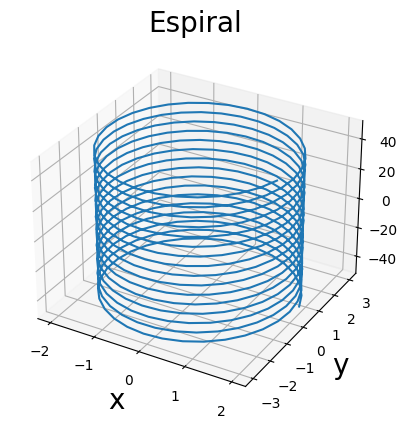

In [99]:
t = np.linspace(-50,50,500)
X = lambdify(s,x.subs(a,2).subs(b,3))(t)
Y = lambdify(s,y.subs(a,2).subs(b,3))(t)
Z = lambdify(s,z)(t)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

ax.set_title("Espiral", size=20)
ax.plot(X,Y,Z)

ax.set_xlabel("x", size = 20)
ax.set_ylabel("y", size = 20)

plt.show()

In [100]:
## Primera derivada de alpha
dalpha = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
da_norma = norma(dalpha)
print('primera derivada alpha =',dalpha)
print('norma =', da_norma)

primera derivada alpha = (-a*sin(s), b*cos(s), 1)
norma = sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)


#### *Vector Tanget*
$$(1). \hat{T(t)} = \frac{\alpha'(s)}{|\alpha'(s)|}$$

In [101]:
#Vector tangente unitario
T = (dalpha[0]/da_norma,dalpha[1]/da_norma,dalpha[2]/da_norma)
#Norma del vector tangente
da_norma = norma(T)
print('Vector tangente =',T)
print('norma =', da_norma)

Vector tangente = (-a*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), b*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), 1/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1))
norma = 1


In [102]:
# Primera derivada del vector tangente unitario
dT = (sp.diff(T[0],s), sp.diff(T[1],s), sp.diff(T[2],s))
# Norma de la primera derivada del vector tangente unitario
da_norma = norma(dT)
print('derivada del vector tangente =',dT)
print('norma =', da_norma)

derivada del vector tangente = (-a*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*sin(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - a*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), b*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*cos(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - b*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1), (-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2))
norma = sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)


#### *Vector Normal*
$$(2). \hat{N}(t) = \frac{T'}{|T'|}$$

In [103]:
#Vector Normal unitario
N = (dT[0]/da_norma,dT[1]/da_norma,dT[2]/da_norma)
# Norma del vector normal unitario
da_norma = norma(N)
print('Vector Normal =',N)
print('norma =', da_norma)

Vector Normal = ((-a*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*sin(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - a*cos(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1))/sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2), (b*(-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))*cos(s)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2) - b*sin(s)/sqrt(a**2*sin(s)**2 + b**2*cos(s)**2 + 1))/sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2), (-a**2*sin(s)*cos(s) + b**2*sin(s)*cos(s))/(sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2)))
norma = 1


#### *Vector Binomial*
$$(3). \hat{B}(t) = \hat{T(t)} \times \hat{N(t)}$$


In [104]:
# Vector Binomial
B = np.cross(T,N)
B = (B[0].simplify(), B[1].simplify(), B[2].simplify())
# Norma del vector Binomial
da_norma = norma(B)
print('Vector Binomial =',B)
print('norma =', da_norma)

Vector Binomial = (b*sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2*sin(s)/((a**2*sin(s)**2 + b**2*cos(s)**2 + 1)*(a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)), a*sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2*cos(s)/((-a**2*sin(s)**2 - b**2*cos(s)**2 - 1)*(a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)), a*b/(sqrt((a**2*b**2 - a**2*sin(s)**2 + a**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 - b**2*sin(s)**2 + b**2 + 1)**2)*(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)))
norma = 1


4.3 Evaluate curvature $k(t)$ and torsion $\tau(t)$ for $\alpha(t)$. Plot the funcitons $k(t)$ and $\tau(t)$,
use parameters a = 2 and b = 3 for plots.
Important formulas to consider:
$$(4). k(t) = \frac {|\alpha'(t) \times \alpha''(t)|}{|\alpha'|^{3}}$$
$$(5).\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$


#### *Curvature $k(t)$*
$$(4). k(t) = \frac {|\alpha'(t) \times \alpha''(t)|}{|\alpha'|^{3}}$$


In [105]:
## Segunda derivada de alpha
ddalpha = (sp.diff(x,s,2), sp.diff(y,s,2), sp.diff(z,s,2))
da_norma = norma(ddalpha)
print('segunda derivada alpha =',ddalpha)
print('norma =', da_norma)

segunda derivada alpha = (-a*cos(s), -b*sin(s), 0)
norma = sqrt(a**2*cos(s)**2 + b**2*sin(s)**2)


In [106]:
## Curvatura 
k  = norma(np.cross(dalpha,ddalpha))/(norma(dalpha)**3)
print('Curvatura', k)

Curvatura sqrt(a**2*b**2 + a**2*cos(s)**2 + b**2*sin(s)**2)/(a**2*sin(s)**2 + b**2*cos(s)**2 + 1)**(3/2)


#### *Torsion $\tau(t)$*
$$(5).\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$

In [107]:
# Tercera derivada de alpha
dddalpha = (sp.diff(x,s,3), sp.diff(y,s,3), sp.diff(z,s,3))
da_norma = norma(ddalpha)
print('Tercera derivada alpha =',dddalpha)
print('norma =', da_norma)

Tercera derivada alpha = (a*sin(s), -b*cos(s), 0)
norma = sqrt(a**2*cos(s)**2 + b**2*sin(s)**2)


In [108]:
## Torsión
tau = - (np.dot(np.cross(dalpha,ddalpha),dddalpha)/(norma(np.cross(dalpha,ddalpha))**2))
print('torsion =', tau)

torsion = -(a*b*sin(s)**2 + a*b*cos(s)**2)/(a**2*b**2 + a**2*cos(s)**2 + b**2*sin(s)**2)


*Graphic*

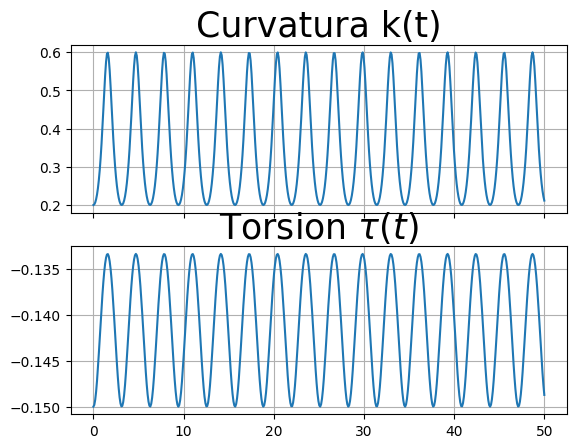

In [109]:
t = np.linspace(0,50,500)
K = lambdify(s,k.subs(a,2).subs(b,3))(t)
Tau = lambdify(s,tau.subs(a,2).subs(b,3))(t)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t,K)
ax1.set_title(r"Curvatura k(t)", size=25)
ax1.grid(True)
ax2.plot(t,Tau)
ax2.set_title(r"Torsion $\tau(t)$", size=25)
ax2.grid(True)




4.4 Use libraries as matplotlib.pyplot.quiver in order to plot the vectors $\hat{T(t)}$, $\hat{N(t)}$ and $\hat{B(t)}$ on the curve.

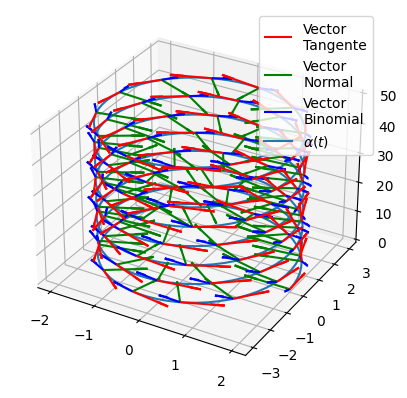

In [110]:
u = np.linspace(0,50,500)
x_ = lambdify(s,x.subs(a,2).subs(b,3))(u)
y_ = lambdify(s,y.subs(a,2).subs(b,3))(u)
z_ = lambdify(s,z)(u)
t = np.linspace(0,50,100)
x_position = lambdify(s,x.subs(a,2).subs(b,3))(t) 
y_position = lambdify(s,y.subs(a,2).subs(b,3))(t)
z_position = lambdify(s,z)(t)
# Dirección es el vector tangente
x_tanget = lambdify(s,T[0].subs(a,2).subs(b,3))(t)
y_tanget = lambdify(s,T[1].subs(a,2).subs(b,3))(t)
z_tanget = lambdify(s,T[2].subs(a,2).subs(b,3))(t)
# Vector normal 
x_normal = lambdify(s,N[0].subs(a,2).subs(b,3))(t)
y_normal = lambdify(s,N[1].subs(a,2).subs(b,3))(t)
z_normal = lambdify(s,N[2].subs(a,2).subs(b,3))(t)
#Vector binomial
x_binomial = lambdify(s,B[0].subs(a,2).subs(b,3))(t)
y_binomial = lambdify(s,B[1].subs(a,2).subs(b,3))(t)
z_binomial = lambdify(s,B[2].subs(a,2).subs(b,3))(t)
# grafics
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.quiver(x_position,y_position, z_position, x_tanget, y_tanget,z_tanget, color = 'red', label = 'Vector\nTangente')
ax.quiver(x_position,y_position, z_position, x_normal, y_normal, z_normal, color = 'green', label = 'Vector\nNormal')
ax.quiver(x_position,y_position, z_position, x_binomial, y_binomial, z_binomial, color = 'blue', label = 'Vector\nBinomial')
ax.plot(x_,y_, z_, label = r"$\alpha (t)$")
plt.legend(loc = 1)
plt.show()



5. Consider the toroidal spiral curve:
$$\alpha (t) = ((a + cos(\omega t))cos(t),(a + cos(\omega t))sin(\omega t), sin(\omega t))$$



In [111]:
## Definimos la norma sin simplify()
def norma(x):
  return sp.sqrt(np.dot(x,x))

In [112]:
## Definimos las variables y alpha
a,w = sp.symbols("a,w", positive = True, real = True)
s = sp.symbols("s")
x,y,z,alpha,dalpha,ddalpha,dddalpha,T,dT,N,B,k,tau = sp.symbols("x,y,z,alpha,dalpha,ddalpha,dddalpha,T,dT,N,B,k,tau", cls = sp.Function)
da_norma = sp.symbols ("da_norma", cls = sp.Function)

In [113]:
x = (a + sp.cos(w*s))*sp.cos(s)
y = (a + sp.cos(w*s))*sp.sin(w*s)
z = sp.sin(w*s)
alpha = (x,y,z)
print('alpha(s) = ',alpha)
print('norma alpha = ', norma(alpha))

alpha(s) =  ((a + cos(s*w))*cos(s), (a + cos(s*w))*sin(s*w), sin(s*w))
norma alpha =  sqrt((a + cos(s*w))**2*sin(s*w)**2 + (a + cos(s*w))**2*cos(s)**2 + sin(s*w)**2)


*Graphic*

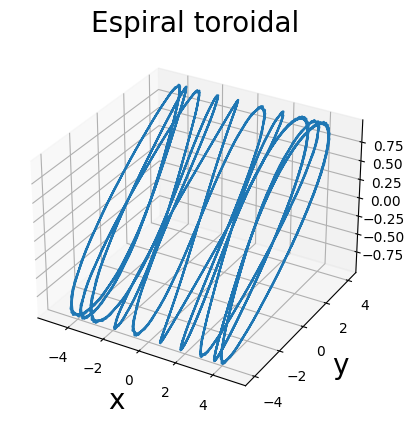

In [154]:
t = np.linspace(0,20,500)
X = lambdify(s,x.subs(a,4).subs(w,10))(t)
Y = lambdify(s,y.subs(a,4).subs(w,10))(t)
Z = lambdify(s,z.subs(w,10))(t)

fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

ax.set_title("Espiral toroidal", size=20)
ax.plot(X,Y,Z)

ax.set_xlabel("x", size = 20)
ax.set_ylabel("y", size = 20)

plt.show()

5.1 Evaluate the unit vectors $\hat{T(t)}$ and $\hat{N(t)}$ for $\alpha(t)$, (Try with $\hat{B(t)}$).

In [115]:
## Primera derivada de alpha
dalpha = (sp.diff(x,s), sp.diff(y,s), sp.diff(z,s))
da_norma = norma(dalpha)
print('primera derivada alpha =',dalpha)
print('norma =', da_norma)

primera derivada alpha = (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s), w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2, w*cos(s*w))
norma = sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2)


Como la norma de la primera derivada no es uno debemos tener en cuenta las siguientes formulas:
#### *Vector Tanget*
$$(1). \hat{T(t)} = \frac{\alpha'(s)}{|\alpha'(s)|}$$

In [116]:
#Vector tangente unitario
T = (dalpha[0]/da_norma,dalpha[1]/da_norma,dalpha[2]/da_norma)
#Norma del vector tangente
da_norma = norma(T)
print('Vector tangente =',T)
print('norma =', da_norma)

Vector tangente = ((-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2), (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2), w*cos(s*w)/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2))
norma = sqrt(w**2*cos(s*w)**2/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2) + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2) + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2))


#### *Vector Normal*
$$(2). \hat{N}(t) = \frac{T'}{|T'|}$$

In [117]:
# Primera derivada del vector tangente unitario
dT = (sp.diff(T[0],s), sp.diff(T[1],s), sp.diff(T[2],s))
# Norma de la primera derivada del vector tangente unitario
da_norma = norma(dT)
print('derivada del vector tangente =',dT)
print('norma =', da_norma)

derivada del vector tangente = ((-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*(w**3*sin(s*w)*cos(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-2*w**2*(a + cos(s*w))*sin(s*w) - 6*w**2*sin(s*w)*cos(s*w))/2 - (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*(-2*w**2*cos(s)*cos(s*w) + 4*w*sin(s)*sin(s*w) - 2*(a + cos(s*w))*cos(s))/2)/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2)**(3/2) + (-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s))/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2), (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(w**3*sin(s*w)*cos(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-2*w**2*(a + cos(s*w))*sin(s*w) - 6*w**2*sin(s*w)*cos(s*w))/2 - (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*(-2*w**2*cos(s)*cos(s*w) + 4*w*sin(s)*sin(s*w) - 2*(a + cos(s*w))*cos(s))/2)/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w

In [118]:
#Vector Normal unitario
N = (dT[0]/da_norma,dT[1]/da_norma,dT[2]/da_norma)
# Norma del vector normal unitario
da_norma = norma(N)
print('Vector Normal =',N)
print('norma =', da_norma)

Vector Normal = (((-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*(w**3*sin(s*w)*cos(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-2*w**2*(a + cos(s*w))*sin(s*w) - 6*w**2*sin(s*w)*cos(s*w))/2 - (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*(-2*w**2*cos(s)*cos(s*w) + 4*w*sin(s)*sin(s*w) - 2*(a + cos(s*w))*cos(s))/2)/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2)**(3/2) + (-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s))/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2))/sqrt((-w**2*sin(s*w)/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2) + w*(w**3*sin(s*w)*cos(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-2*w**2*(a + cos(s*w))*sin(s*w) - 6*w**2*sin(s*w)*cos(s*w))/2 - (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*(-2*w**2*cos(s)*cos(s*w) + 4*w*si

#### *Vector Binomial*
$$(3). \hat{B}(t) = \hat{T(t)} \times \hat{N(t)}$$

In [119]:
# Vector Binomial
B = np.cross(T,N)
B = (B[0], B[1], B[2])
# Norma del vector Binomial
da_norma = norma(B)
print('Vector Binomial =',B)
print('norma =', da_norma)

Vector Binomial = (-w*((w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(w**3*sin(s*w)*cos(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-2*w**2*(a + cos(s*w))*sin(s*w) - 6*w**2*sin(s*w)*cos(s*w))/2 - (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*(-2*w**2*cos(s)*cos(s*w) + 4*w*sin(s)*sin(s*w) - 2*(a + cos(s*w))*cos(s))/2)/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2)**(3/2) + (-w**2*(a + cos(s*w))*sin(s*w) - 3*w**2*sin(s*w)*cos(s*w))/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2))*cos(s*w)/(sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2)*sqrt((-w**2*sin(s*w)/sqrt(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2) + w*(w**3*sin(s*w)*cos(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-2*w**2*(a + cos(

5.2 Evaluate curvature $κ(t)$ and torsion $\tau(t)$ for $\alpha(t)$. Use parameters $a = 4$ and $\omega = 10$
for plots.

#### *Curvature $k(t)$*
$$(4). k(t) = \frac {|\alpha'(t) \times \alpha''(t)|}{|\alpha'|^{3}}$$

In [120]:
## Segunda derivada de alpha
ddalpha = (sp.diff(x,s,2), sp.diff(y,s,2), sp.diff(z,s,2))
da_norma = norma(ddalpha)
print('segunda derivada alpha =',ddalpha)
print('norma =', da_norma)

segunda derivada alpha = (-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s), -w**2*(a + 4*cos(s*w))*sin(s*w), -w**2*sin(s*w))
norma = sqrt(w**4*(a + 4*cos(s*w))**2*sin(s*w)**2 + w**4*sin(s*w)**2 + (-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s))**2)


In [121]:
## Curvatura 
k  = norma(np.cross(dalpha,ddalpha))/(norma(dalpha)**3)
print('Curvatura', k)

Curvatura sqrt((w**2*(-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*sin(s*w) + w*(-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s))*cos(s*w))**2 + (-w**2*(a + 4*cos(s*w))*(-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*sin(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s)))**2 + (w**3*(a + 4*cos(s*w))*sin(s*w)*cos(s*w) - w**2*(w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*sin(s*w))**2)/(w**2*cos(s*w)**2 + (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)**2 + (-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))**2)**(3/2)


#### *Torsion $\tau(t)$*
$$(5).\tau(t) = - \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{|\alpha'(t) \times \alpha''(t)|^{2}}$$

In [122]:
# Tercera derivada de alpha
dddalpha = (sp.diff(x,s,3), sp.diff(y,s,3), sp.diff(z,s,3))
da_norma = norma(ddalpha)
print('Tercera derivada alpha =',dddalpha)
print('norma =', da_norma)

Tercera derivada alpha = (w**3*sin(s*w)*cos(s) + 3*w**2*sin(s)*cos(s*w) + 3*w*sin(s*w)*cos(s) + (a + cos(s*w))*sin(s), w**3*(-(a + cos(s*w))*cos(s*w) + 4*sin(s*w)**2 - 3*cos(s*w)**2), -w**3*cos(s*w))
norma = sqrt(w**4*(a + 4*cos(s*w))**2*sin(s*w)**2 + w**4*sin(s*w)**2 + (-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s))**2)


In [123]:
## Torsión
tau = - (np.dot(np.cross(dalpha,ddalpha),dddalpha)/(norma(np.cross(dalpha,ddalpha))**2))
print('torsion =', tau)

torsion = -(w**3*(w**2*(-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*sin(s*w) + w*(-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s))*cos(s*w))*(-(a + cos(s*w))*cos(s*w) + 4*sin(s*w)**2 - 3*cos(s*w)**2) - w**3*(-w**2*(a + 4*cos(s*w))*(-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*sin(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s)))*cos(s*w) + (w**3*(a + 4*cos(s*w))*sin(s*w)*cos(s*w) - w**2*(w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*sin(s*w))*(w**3*sin(s*w)*cos(s) + 3*w**2*sin(s)*cos(s*w) + 3*w*sin(s*w)*cos(s) + (a + cos(s*w))*sin(s)))/((w**2*(-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*sin(s*w) + w*(-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s))*cos(s*w))**2 + (-w**2*(a + 4*cos(s*w))*(-w*sin(s*w)*cos(s) - (a + cos(s*w))*sin(s))*sin(s*w) - (w*(a + cos(s*w))*cos(s*w) - w*sin(s*w)**2)*(-w**2*cos(s)*cos(s*w) + 2*w*sin(s)*sin(s*w) - (a + cos(s*w))*cos(s)))**2 + (w**3*(a + 4*cos(s*w

*Graphic*

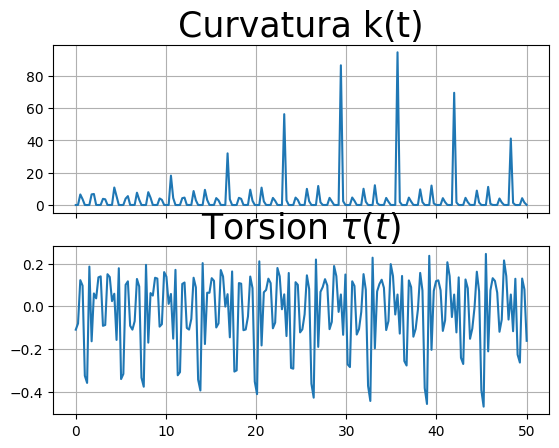

In [129]:
t = np.linspace(0,50,200)
K = lambdify(s,k.subs(a,4).subs(w,10))(t)
Tau = lambdify(s,tau.subs(a,4).subs(w,10))(t)
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.plot(t,K)
ax1.set_title(r"Curvatura k(t)", size=25)
ax1.grid(True)
ax2.plot(t,Tau)
ax2.set_title(r"Torsion $\tau(t)$", size=25)
ax2.grid(True)